In [242]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
#import dictionary vectorizer
from sklearn.feature_extraction import DictVectorizer


In [243]:
data = pd.read_csv('Housing.csv')

In [244]:
housing = data.copy()

In [245]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [246]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [247]:
housing.price = housing.price.astype('float64')

In [248]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [249]:
housing.describe().round()

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.0,5151.0,3.0,1.0,2.0,1.0
std,1870440.0,2170.0,1.0,1.0,1.0,1.0
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


Correlation between numerical variables

In [250]:
housing_corr = housing.select_dtypes(exclude=[object])
corr_matrix = housing_corr.corr().round(2) 
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.00,0.54,0.37,0.52,0.42,0.38
area,0.54,1.00,0.15,0.19,0.08,0.35
bedrooms,0.37,0.15,1.00,0.37,0.41,0.14
bathrooms,0.52,0.19,0.37,1.00,0.33,0.18
stories,0.42,0.08,0.41,0.33,1.00,0.05
parking,0.38,0.35,0.14,0.18,0.05,1.00


<Axes: >

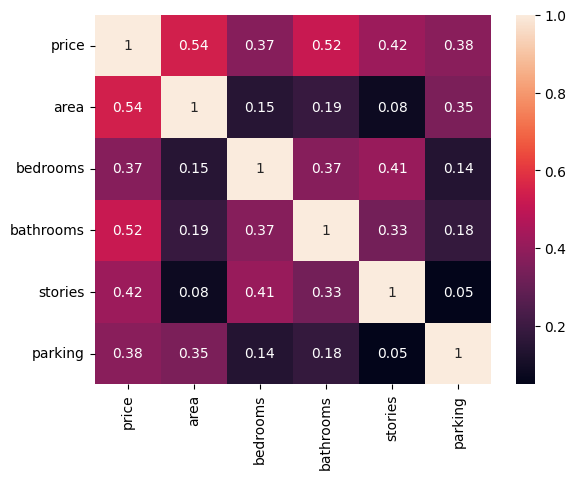

In [251]:
sb.heatmap(corr_matrix, annot = True)

# Training a Ml model (Linear regression)

Import Libraries

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Seperate the features from the target

In [253]:
features = housing.drop( columns = 'price')
target = housing.price

In [254]:
features.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Split the data using 80/20 split

In [255]:
features_train, features_test, target_train, target_test = train_test_split(features, target, train_size = 0.8, test_size = 0.2, random_state = 10)

Subset numeric values

In [256]:
num_var = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
features_train_numeric = features_train[num_var].values
features_test_numeric = features_test[num_var].values

Convert Target to numpy arrays

In [257]:
target_test = np.log1p(target_test).values
target_train = np.log1p(target_train).values

In [258]:
target_test

array([14.89392048, 15.22527752, 15.08807643, 14.86982294, 15.85673102,
       15.50005613, 14.71159899, 14.89392048, 15.41610972, 15.02745183,
       15.74121815, 14.6943075 , 15.16358397, 15.06827381, 15.39035723,
       14.85755285, 15.96436167, 15.51295953, 15.34438918, 15.28338514,
       14.86982294, 14.77255967, 15.43291684, 15.37428677, 15.53200772,
       15.50652864, 15.33063801, 15.26712462, 15.09783261, 14.63749105,
       15.00639843, 15.44671016, 15.24892726, 15.62788948, 15.75137052,
       15.61059798, 15.71012756, 14.89392048, 15.43291684, 15.48038337,
       15.25059532, 15.5750913 , 14.55744838, 15.64488705, 15.61059798,
       15.82907949, 16.13298436, 15.53200772, 15.06827381, 15.52569855,
       15.18160247, 15.37575844, 15.02745183, 15.31357011, 15.02745183,
       15.18160247, 15.22613186, 15.1265427 , 15.43152698, 15.10749451,
       15.10749451, 15.39035723, 15.26876262, 15.19930204, 14.89392048,
       15.56296994, 15.1265427 , 14.79383706, 14.65275852, 15.63

In [259]:
lrmodel = LinearRegression()
lrmodel.fit(features_train_numeric, target_train)

LinearRegression()

In [260]:
target_prediction = lrmodel.predict(features_test_numeric)
print(target_prediction[:10].round(3))
print(target_train[:10].round(3))

[15.089 15.156 15.564 15.312 15.894 15.615 15.261 15.179 15.324 14.966]
[14.985 15.208 15.519 15.361 15.145 15.117 15.275 14.712 14.74  15.199]


In [261]:
# return predicted values back to normal from the natural log
#target_prediction = np.expm1(target_prediction)
#target_prediction

In [262]:
rmse = root_mean_squared_error(target_test, target_prediction)
mse = mean_squared_error(target_test, target_prediction)
print(f'Root mean squared error: {rmse.round(3)}')
print(f'Mean squared error: {mse.round(3)}')

Root mean squared error: 0.233
Mean squared error: 0.054


In [263]:
accuracy_score = r2_score(target_test, target_prediction)
print(f'Accuracy: {accuracy_score :2f}')
percent = (accuracy_score * 100)
print(f'Accuracy {percent :2f}%')


Accuracy: 0.522635
Accuracy 52.263474%


# Feature engineering

Step 1: Create a list of numerical and categorical features
Step 2: Create a new dataframe with the numerical and categorical features
step 3: Convert the dataframe into a dictionary
Step 4: Create a new dataframe with the dictionary
Step 5: Convert dictionary to a vector using the dictvectorizer
Step 6: Cnvert the vector into a sparse matrix
Step 7: Continue with the linear regression


In [264]:
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

features_train_fe = features_train[numerical_features + categorical_features]
features_test_fe = features_test[numerical_features + categorical_features]

In [265]:
features_train_fe_dict = features_train_fe.to_dict(orient = 'records')
features_test_fe_dict = features_test_fe.to_dict(orient = 'records')

In [266]:
features_test_fe_dict

[{'area': 3150,
  'bedrooms': 3,
  'bathrooms': 1,
  'stories': 2,
  'parking': 0,
  'mainroad': 'no',
  'guestroom': 'no',
  'basement': 'no',
  'hotwaterheating': 'no',
  'airconditioning': 'no',
  'prefarea': 'no',
  'furnishingstatus': 'unfurnished'},
 {'area': 4040,
  'bedrooms': 2,
  'bathrooms': 1,
  'stories': 2,
  'parking': 1,
  'mainroad': 'yes',
  'guestroom': 'no',
  'basement': 'no',
  'hotwaterheating': 'no',
  'airconditioning': 'no',
  'prefarea': 'no',
  'furnishingstatus': 'semi-furnished'},
 {'area': 4500,
  'bedrooms': 4,
  'bathrooms': 2,
  'stories': 2,
  'parking': 2,
  'mainroad': 'yes',
  'guestroom': 'no',
  'basement': 'yes',
  'hotwaterheating': 'no',
  'airconditioning': 'no',
  'prefarea': 'no',
  'furnishingstatus': 'furnished'},
 {'area': 5400,
  'bedrooms': 4,
  'bathrooms': 1,
  'stories': 2,
  'parking': 0,
  'mainroad': 'yes',
  'guestroom': 'no',
  'basement': 'no',
  'hotwaterheating': 'no',
  'airconditioning': 'no',
  'prefarea': 'no',
  'furnis

In [267]:
dv = DictVectorizer()
dv.fit(features_train_fe_dict)

DictVectorizer()

In [268]:
features_train_fe = dv.transform(features_train_fe_dict)
features_test_fe = dv.transform(features_test_fe_dict)

In [269]:
features_test_fe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1308 stored elements and shape (109, 20)>

In [270]:
lrmodel_fe = LinearRegression()
lrmodel_fe.fit(features_train_fe, target_train)

LinearRegression()

In [271]:
target_prediction_fe = lrmodel_fe.predict(features_test_fe)
print(target_prediction_fe[:10])
print(target_test[:10])

[14.82708893 15.13040283 15.50567189 15.10760428 15.69174369 15.72390615
 15.04976502 14.89366329 15.41649809 14.90427027]
[14.89392048 15.22527752 15.08807643 14.86982294 15.85673102 15.50005613
 14.71159899 14.89392048 15.41610972 15.02745183]


In [272]:
rmse = root_mean_squared_error(target_test, target_prediction_fe)
print(f'rmse: {rmse}')

rmse: 0.1770494507967244


In [273]:
accuracy = r2_score(target_test, target_prediction_fe)
accuracy

0.7241041854385695

Trying hands on random forest

In [274]:
rf = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', random_state = 10, n_jobs = -1, max_features = 12)
rf.fit(features_train_fe, target_train)
randomf_prediction = rf.predict(features_test_fe)
print(randomf_prediction[:10])
print(target_test[:10])

[14.814688   15.12523212 15.46188775 15.00662445 15.71352506 15.61553783
 14.94790269 14.93839979 15.30322569 14.99392576]
[14.89392048 15.22527752 15.08807643 14.86982294 15.85673102 15.50005613
 14.71159899 14.89392048 15.41610972 15.02745183]


In [275]:
'''
rf = RandomForestRegressor(n_estimators = 100000, criterion = 'squared_error', random_state = 10, n_jobs = -1, max_features = 12)
rf.fit(features_train_fe, target_train)
randomf_prediction = rf.predict(features_test_fe)
print(randomf_prediction[:10])
print(target_test[:10])'''

"\nrf = RandomForestRegressor(n_estimators = 100000, criterion = 'squared_error', random_state = 10, n_jobs = -1, max_features = 12)\nrf.fit(features_train_fe, target_train)\nrandomf_prediction = rf.predict(features_test_fe)\nprint(randomf_prediction[:10])\nprint(target_test[:10])"

In [276]:
rmse = root_mean_squared_error(target_test, randomf_prediction)
print(f'rmse: {rmse}') #rmse

rmse: 0.18587415695155746


In [277]:
accuracy = r2_score(target_test, randomf_prediction)
accuracy

0.6959157210981038